<a href="https://colab.research.google.com/github/leandro095/GIS-Heatmap-popolazione-ferrovie/blob/main/Geojson_ferrovie_secondarie_chiuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

In [ ]:
# === 1. CARICA SHAPEFILE ===
ferrovie = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/HEATMAPS/file_italia/hotosm_ita_railways_lines_geojson.geojson')
print(f"Shapefile caricato: {len(ferrovie)} linee")
print(ferrovie.crs)  # Deve essere EPSG:4326

Shapefile caricato: 77866 linee
EPSG:4326


# Massa Marittima

In [ ]:
# === 2. COORDINATE PRECISE FOLLONICA-MASSA MARITTIMA (storiche) ===
# Dati da mappe IGM 1:25.000 (1910-1940) + OpenStreetMap
stazioni_follonica = {
'nome': 'Follonica Porto-Massa Marittima',
'anno_apertura': 1902,
'anno_chiusura': 1948,
'lunghezza_km': 22.5,
'stato': 'chiusa'}

# Coordinate WGS84 (Long, Lat) - tracciato reale con stazioni intermedie
tracciato_completo = LineString([
# Follonica Porto (stazione origine)
(10.7492, 42.9408),  # Follonica Stazione
(10.7521, 42.9432),  # Bivio Follonica
(10.7605, 42.9501),  # Stazione Scarlino (km 5.2)
(10.7683, 42.9557),  # Ponte sul Padule
(10.7759, 42.9612),  # Stazione Gavorrano (km 10.1)
(10.7824, 42.9668),  # Galleria Castiglioncello
(10.7887, 42.9723),  # Bivio Casteani
(10.8942, 42.9991),  # Massa Marittima (stazione capolinea)
])

In [ ]:
# === 3. CREA NUOVA LINEA ===
nuova_ferrovia = gpd.GeoDataFrame([stazioni_follonica], geometry=[tracciato_completo], crs='EPSG:4326')

In [ ]:
# === 4. AGGIUNGI AL SHAPEFILE ===
ferrovie_complete = pd.concat([ferrovie, nuova_ferrovia], ignore_index=True)
print(f"Nuovo totale: {len(ferrovie_complete)} linee")

Nuovo totale: 77867 linee


In [ ]:
# === 5. SALVA SHAPEFILE AGGIORNATO ===
ferrovie_complete.to_file('/content/drive/MyDrive/ferrovie_con_follonica.geojson', driver='GeoJSON')
print("✅ Salvato: ferrovie_con_follonica.geojson su Google Drive")

✅ Salvato: ferrovie_con_follonica.geojson su Google Drive


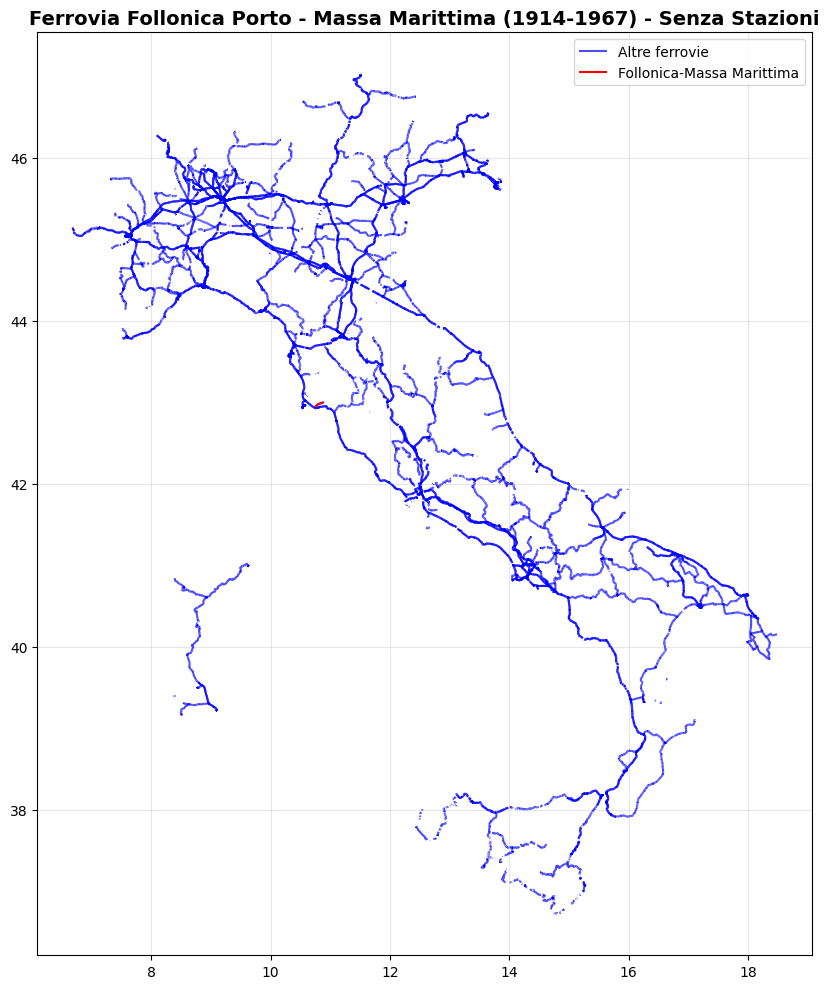

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ferrovie_complete.plot(ax=ax, linewidth=1.5, alpha=0.7, color='blue', label='Altre ferrovie')
nuova_ferrovia.plot(ax=ax, linewidth=1.5, color='red', label='Follonica-Massa Marittima')

ax.set_title('Ferrovia Follonica Porto - Massa Marittima (1914-1967) - Senza Stazioni', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mappa_follonica_senza_stazioni.png', dpi=300, bbox_inches='tight')
plt.show()

# Tutte le ferrovie secondarie

In [ ]:
# aggiungo nuove ferrovie al file e imposto le coordinate dei loro punti principali, comprese curve e stazioni
nuove_ferrovie = {"Pracchia-Mammiano": {"nome": "Ferrovia Pracchia-Mammiano", "anno chiusura": "1965", "stato": "chiusa", "stazioni": [
                 {"nome": "Pracchia", "coords": [44.0075, 10.9667]},
                 {"nome": "Mammiano Bolognana", "coords": [44.0214, 10.9356]},
                 {"nome": "San Marcello Pistoiese", "coords": [44.0461, 10.9172]},
                 {"nome": "Piteglio", "coords": [44.0600, 10.9000]},
                 {"nome": "Cutigliano", "coords": [44.0800, 10.8800]},
                 {"nome": "Popiglio", "coords": [44.0650, 10.8900]},
                 {"nome": "San Mommè", "coords": [44.0700, 10.8850]},
                 {"nome": "Pancianella", "coords": [44.0750, 10.8825]},
                 {"nome": "Bagni di Lucca", "coords": [44.0100, 10.6800]}
                 ]},

                 "Montepulciano-Fontago": { "nome": "Ferrovia Montepulciano-Fontago", "anno chiusura": "1927", "stato": "chiusa",
                 "stazioni": [
                 {"nome": "Montepulciano Stazione", "coords": [43.1351, 11.8564]},
                 {"nome": "Gracciano", "coords": [43.1317, 11.8285]},
                 {"nome": "Bivio di Nottola", "coords": [43.1214, 11.8244]},
                 {"nome": "Montepulciano Scalo", "coords": [43.0961, 11.7869]},
                 ]},

                "Santellero-Saltino": {
                 "nome": "Ferrovia Sant'Ellero-Saltino",
                 "anno chiusura": "1923",
                 "stato": "chiusa",
                 "stazioni": [
                 {"nome": "Sant'Ellero", "coords": [43.7500, 11.2500]},
                 {"nome": "Saltino", "coords": [43.7800, 11.2700]}
                 ]},

                 "Poggibonsi-Colle Val d'Elsa": {"nome": "Ferrovia Poggibonsi-Colle Val d'Elsa", "anno chiusura": "1987", "stato": "chiusa",
                 "stazioni": [
                {"nome": "Poggibonsi", "coords": [43.4681, 11.1493]},
                {"nome": "La Rocchetta (Pian dei Campi)", "coords": [43.4435, 11.1344]},
                {"nome": "Colle Val d'Elsa", "coords": [43.4232, 11.1266]}
                ]},

                "Orbetello-Porto Santo Stefano": {"nome": "Orbetello-Porto Santo Stefano", "anno chiusura": "1948", "stato": "chiusa",
                "stazioni": [
                {"nome": "Orbetello Città", "coords": [42.4390, 11.2200]},
                {"nome": "Terra Rossa", "coords": [42.4320, 11.1980]},
                {"nome": "Le Piane", "coords": [42.4265, 11.1820]},
                {"nome": "Santa Liberata", "coords": [42.4345, 11.1515]},
                {"nome": "Porto Santo Stefano", "coords": [42.4327, 11.1231]}
                ]},

                "Arezzo-Fossato di Vico": {"nome": "Ferrovia Arezzo-Fossato di Vico", "anno chiusura": "1945", "stato": "chiusa",
                "stazioni": [
                {"nome": "Arezzo", "coords": [43.4636, 11.8797]},
                {"nome": "Castiglion Fiorentino", "coords": [43.2750, 11.9167]},
                {"nome": "Cortona", "coords": [43.2650, 11.9800]},
                {"nome": "Umbertide", "coords": [43.3050, 12.3300]},
                {"nome": "Gubbio", "coords": [43.3550, 12.5700]},
                {"nome": "Fossato di Vico", "coords": [43.3300, 12.7500]}
                ]},

                "Asciano-Monte Antico": {"nome": "Ferrovia Siena-Buonconvento", "anno chiusura": "1966", "stato": "chiusa",
                "stazioni": [
                {"nome": "Asciano", "coords": [43.235497, 11.579792]},
                {"nome": "Curva", "coords": [43.239673, 11.598583]},
                {"nome": "Montalceto", "coords": [43.219579, 11.613665]},
                {"nome": "Trequanda", "coords": [43.193643, 11.60319]},
                {"nome": "curva", "coords": [43.188148, 11.602564]},
                {"nome": "curva", "coords": [43.175025, 11.611376]},
                {"nome": "curva", "coords": [43.165661, 11.610323]},
                {"nome": "San Giovanni d'Asso", "coords": [43.151191, 11.590577]},
                {"nome": "curva", "coords": [43.148747, 11.586066]},
                {"nome": "Torrenieri", "coords": [43.084756, 11.551026]},
                {"nome": "curva", "coords": [43.078226, 11.546736]},
                {"nome": "curva", "coords": [43.052576, 11.551722]},
                {"nome": "curva", "coords": [43.043571, 11.558674]},
                {"nome": "curva", "coords": [43.036393, 11.553183]},
                {"nome": "curva", "coords": [43.027286, 11.551322]},
                {"nome": "curva", "coords": [43.008168, 11.556641]},
                {"nome": "curva", "coords": [42.996234, 11.550127]},
                {"nome": "Monte Amiata", "coords": [42.976346, 11.546819]},
                {"nome": "curva", "coords": [42.973812, 11.532352]},
                {"nome": "curva", "coords": [42.9818, 11.519383]},
                {"nome": "curva", "coords": [42.980223, 11.504831]},
                {"nome": "curva", "coords": [42.976964, 11.501718]},
                {"nome": "curva", "coords": [42.975912, 11.494707]},
                {"nome": "curva", "coords": [42.965334, 11.482621]},
                {"nome": "Sant'Angelo Scalo", "coords": [42.964657, 11.425935]},
                {"nome": "curva", "coords": [42.968126, 11.387316]},
                {"nome": "curva", "coords": [42.981388, 11.370743]},
                {"nome": "Monte Antico", "coords": [42.981305, 11.362114]}
                ]},

                "Volterra-Saline di Volterra": {"nome": "Ferrovia Volterra-Saline di Volterra", "anno chiusura": "1987", "stato": "chiusa",
                "stazioni": [
                {"nome": "Volterra", "coords": [43.4000, 10.8750]},
                {"nome": "Saline di Volterra", "coords": [43.3750, 10.7450]}
                ]},

                "Cecina-Saline di Volterra": {"nome": "Ferrovia Cecina-Saline di Volterra", "anno chiusura": "1962", "stato": "chiusa",
                "stazioni": [
                {"nome": "Cecina", "coords": [43.3283, 10.5186]},
                {"nome": "Riparbella", "coords": [43.4000, 10.5800]},
                {"nome": "Guardistallo", "coords": [43.3500, 10.6200]},
                {"nome": "Saline di Volterra", "coords": [43.3750, 10.7450]}
                ]},

                "Massa Marittima-Follonica Porto": {"nome": "Ferrovia Massa Marittima-Follonica Porto", "anno chiusura": "1948", "stato": "chiusa",
                "stazioni": [
                {"nome": "Massa Marittima", "coords": [42.9991, 10.8942]},
                {"nome": "Bivio Casteani", "coords": [42.9723, 10.7887]},
                {"nome": "Galleria Castiglioncello", "coords": [42.9668, 10.7824]},
                {"nome": "Stazione Gavorrano", "coords": [42.9612, 10.7759]},
                {"nome": "Ponte sul Padule", "coords": [42.9557, 10.7683,]},
                {"nome": "Stazione Scarlino", "coords": [42.9501, 10.7605]},
                {"nome": "Follonica", "coords": [42.9432, 10.7521]},
                {"nome": "Follonica Porto", "coords": [42.9408, 10.7492]}
                ]},

                "Pisa-Tirrenia-Livorno": {"nome": "Pisa-Tirrenia-Livorno", "anno chiusura": "1960", "stato": "chiusa",
                "stazioni": [
                {"nome": "Pisa Stazione", "coords": [43.707743, 10.398519]},
                {"nome": "Scalo industriale", "coords": [43.705669, 10.378796]},
                {"nome": "San Piero a Grado", "coords": [43.684351, 10.343124]},
                {"nome": "Cipollini", "coords": [43.677104, 10.3301]},
                {"nome": "Torretta", "coords": [43.674716, 10.3199]},
                {"nome": "Fornacina", "coords": [43.675867, 10.302338]},
                {"nome": "Bocca d'Arno", "coords": [43.677337, 10.279823]},
                {"nome": "Fiat", "coords": [43.67505, 10.275886]},
                {"nome": "Marina di Pisa", "coords": [43.665806, 10.281015]},
                {"nome": "Lido", "coords": [43.645622, 10.292517]},
                {"nome": "Via Alberi", "coords": [43.635652, 10.295214]},
                {"nome": "Tirrenia Stazione", "coords": [43.627309, 10.2953]},
                {"nome": "Calambrone", "coords": [43.60437, 10.298281]},
                {"nome": "Calambrone ACIT", "coords": [43.585936, 10.300888]},
                {"nome": "Ponte girevole", "coords": [43.583897, 10.305363]},
                {"nome": "Lido di Calambrone", "coords": [43.584308, 10.308109]},
                {"nome": "incrocio con ferrovia", "coords": [43.589273, 10.329303]},
                {"nome": "AGIP petroli", "coords": [43.585111, 10.336549]},
                {"nome": "ANIC", "coords": [43.581032, 10.3368]},
                {"nome": "S. Stefano", "coords": [43.574888, 10.334858]},
                {"nome": "curva", "coords": [43.570876, 10.323548]},
                {"nome": "Livorno stazione Garibaldi", "coords": [43.565441, 10.324261]},
                {"nome": "Viale Carducci", "coords": [43.553508, 10.32686]},
                {"nome": "Colline", "coords": [43.548429, 10.327473]},
                {"nome": "Strada Aurelia", "coords": [43.545154, 10.327393]},
                {"nome": "curva rotonda SP5", "coords": [43.533938, 10.322792]},
                {"nome": "Barriera Roma", "coords": [43.532111, 10.319066]},
                {"nome": "Livorno Accademia Navale", "coords": [43.528092, 10.310097]}
                ]},

                "Spoleto-Norcia": {"nome": "Spoleto-Norcia", "anno chiusura": "1968", "stato": "chiusa",
                "stazioni": [
                {"nome": "Spoleto Stazione", "coords": [42.747959, 12.736418]},
                {"nome": "museo spoleto", "coords": [42.744873, 12.738048]},
                {"nome": "Punto", "coords": [42.74641, 12.741044]},
                {"nome": "punto curva", "coords": [42.745213, 12.745147]},
                {"nome": "curva", "coords": [42.746223, 12.750319]},
                {"nome": "tornante", "coords": [42.749555, 12.752605]},
                {"nome": "Punto dritta", "coords": [42.749185, 12.753975]},
                {"nome": "Curva", "coords": [42.745429, 12.754606]},
                {"nome": "curva ponte", "coords": [42.746141, 12.756653]},
                {"nome": "curva", "coords": [42.746115, 12.763261]},
                {"nome": "Dritta", "coords": [42.74737, 12.765354]},
                {"nome": "Curvatura", "coords": [42.753156, 12.769515]},
                {"nome": "dritta", "coords": [42.75264, 12.776482]},
                {"nome": "curva", "coords": [42.75137, 12.777395]},
                {"nome": "dritta", "coords": [42.75027, 12.776743]},
                {"nome": "dritta", "coords": [42.748172, 12.77699]},
                {"nome": "Curva", "coords": [42.745094, 12.778493]},
                {"nome": "curva", "coords": [42.744107, 12.777072]},
                {"nome": "punto curva", "coords": [42.743365, 12.776985]},
                {"nome": "pre curva", "coords": [42.742999, 12.778231]},
                {"nome": "curva", "coords": [42.743726, 12.781274]},
                {"nome": "curva", "coords": [42.741552, 12.782956]},
                {"nome": "curva", "coords": [42.740791, 12.780714]},
                {"nome": "curva", "coords": [42.741198, 12.779986]},
                {"nome": "curva", "coords": [42.742434, 12.780232]},
                {"nome": "curva", "coords": [42.742558, 12.781376]},
                {"nome": "curva", "coords": [42.741337, 12.782484]},
                {"nome": "curva", "coords": [42.741123, 12.784295]},
                {"nome": "curva", "coords": [42.73428, 12.789709]},
                {"nome": "curva", "coords": [42.734705, 12.814874]},
                {"nome": "curva", "coords": [42.735749, 12.816962]},
                {"nome": "curva", "coords": [42.74012, 12.817982]},
                {"nome": "curva", "coords": [42.741318, 12.816817]},
                {"nome": "curva", "coords": [42.742706, 12.818954]},
                {"nome": "curva", "coords": [42.744846, 12.818226]},
                {"nome": "curva", "coords": [42.745234, 12.816677]},
                {"nome": "curva", "coords": [42.747906, 12.816941]},
                {"nome": "curva", "coords": [42.747484, 12.818547]},
                {"nome": "curva", "coords": [42.746214, 12.817587]},
                {"nome": "curva", "coords": [42.745585, 12.817859]},
                {"nome": "curva", "coords": [42.744148, 12.820306]},
                {"nome": "curva", "coords": [42.742464, 12.820706]},
                {"nome": "curva", "coords": [42.741496, 12.819901]},
                {"nome": "curva", "coords": [42.741017, 12.820096]},
                {"nome": "curva", "coords": [42.740595, 12.820778]},
                {"nome": "curva", "coords": [42.739664, 12.820896]},
                {"nome": "curva", "coords": [42.739468, 12.818654]},
                {"nome": "curva", "coords": [42.74122, 12.818697]},
                {"nome": "curva", "coords": [42.741909, 12.821354]},
                {"nome": "curva", "coords": [42.744257, 12.821626]},
                {"nome": "curva", "coords": [42.7457, 12.820333]},
                {"nome": "curva", "coords": [42.746691, 12.820579]},
                {"nome": "curva", "coords": [42.74674, 12.819466]},
                {"nome": "curva", "coords": [42.74596, 12.819866]},
                {"nome": "curva", "coords": [42.744257, 12.822344]},
                {"nome": "curva", "coords": [42.74197, 12.822437]},
                {"nome": "curva", "coords": [42.740436, 12.823658]},
                {"nome": "curva", "coords": [42.739016, 12.822057]},
                {"nome": "curva", "coords": [42.737746, 12.818686]},
                {"nome": "curva", "coords": [42.737305, 12.818599]},
                {"nome": "curva", "coords": [42.736883, 12.819435]},
                {"nome": "curva", "coords": [42.738175, 12.822144]},
                {"nome": "curva", "coords": [42.739185, 12.823186]},
                {"nome": "curva", "coords": [42.739517, 12.82415]},
                {"nome": "curva", "coords": [42.740527, 12.824858]},
                {"nome": "Sant'Anatolia di Narco", "coords": [ 42.744054, 12.823945]},
                {"nome": "curva", "coords": [42.735588, 12.834378]},
                {"nome": "curva", "coords": [42.735874, 12.835691]},
                {"nome": "curva", "coords": [42.743765, 12.840463]},
                {"nome": "curva", "coords": [42.746048, 12.840443]},
                {"nome": "curva", "coords": [42.747691, 12.84232]},
                {"nome": "curva", "coords": [42.74757, 12.846671]},
                {"nome": "curva", "coords": [42.748723, 12.847574]},
                {"nome": "curva", "coords": [42.750856, 12.847297]},
                {"nome": "curva", "coords": [42.753591, 12.851175]},
                {"nome": "curva", "coords": [42.755907, 12.856]},
                {"nome": "curva", "coords": [42.756419, 12.857313]},
                {"nome": "curva", "coords": [42.761565, 12.859601]},
                {"nome": "curva", "coords": [42.766258, 12.86348]},
                {"nome": "curva", "coords": [42.773157, 12.86744]},
                {"nome": "curva", "coords": [42.774648, 12.867522]},
                {"nome": "curva", "coords": [42.776479, 12.86981]},
                {"nome": "curva", "coords": [42.781811, 12.870457]},
                {"nome": "curva", "coords": [42.782925, 12.874592]},
                {"nome": "curva", "coords": [42.785583, 12.875649]},
                {"nome": "curva", "coords": [42.786773, 12.879681]},
                {"nome": "curva", "coords": [42.79041, 12.883406]},
                {"nome": "curva", "coords": [42.790433, 12.885489]},
                {"nome": "curva", "coords": [42.792225, 12.888341]},
                {"nome": "curva", "coords": [42.797932, 12.891245]},
                {"nome": "curva", "coords": [42.79867, 12.895996]},
                {"nome": "curva", "coords": [42.801101, 12.897052]},
                {"nome": "curva", "coords": [42.802554, 12.897237]},
                {"nome": "curva", "coords": [42.803029, 12.898499]},
                {"nome": "curva", "coords": [42.807907, 12.899197]},
                {"nome": "curva", "coords": [42.808456, 12.900459]},
                {"nome": "curva", "coords": [42.807563, 12.90642]},
                {"nome": "curva", "coords": [42.809365, 12.915084]},
                {"nome": "curva", "coords": [42.81544, 12.917506]},
                {"nome": "curva", "coords": [42.815576, 12.920461]},
                {"nome": "curva", "coords": [42.817329, 12.921518]},
                {"nome": "curva", "coords": [42.819008, 12.92555]},
                {"nome": "curva", "coords": [42.81952, 12.930865]},
                {"nome": "curva", "coords": [42.819128, 12.934333]},
                {"nome": "curva", "coords": [42.825322, 12.934826]},
                {"nome": "curva", "coords": [42.823275, 12.939987]},
                {"nome": "curva", "coords": [42.820438, 12.94048]},
                {"nome": "curva", "coords": [42.82031, 12.942563]},
                {"nome": "curva", "coords": [42.816757, 12.943671]},
                {"nome": "curva", "coords": [42.810166, 12.945088]},
                {"nome": "curva", "coords": [42.802573, 12.950126]},
                {"nome": "curva", "coords": [42.790764, 12.959279]},
                {"nome": "curva", "coords": [42.790676, 12.969594]},
                {"nome": "curva", "coords": [42.789312, 12.974774]},
                {"nome": "curva", "coords": [42.789871, 12.994729]},
                {"nome": "curva", "coords": [ 42.787649, 12.996919]},
                {"nome": "curva", "coords": [42.791892, 13.002872]},
                {"nome": "curva", "coords": [42.790863, 13.004976]},
                {"nome": "curva", "coords": [42.791063, 13.007559]},
                {"nome": "curva", "coords": [42.790097, 13.009749]},
                {"nome": "curva", "coords": [42.790134, 13.014162]},
                {"nome": "curva", "coords": [42.788226, 13.015924]},
                {"nome": "curva", "coords": [42.789017, 13.019226]},
                {"nome": "curva", "coords": [42.787925, 13.019961]},
                {"nome": "curva", "coords": [42.784791, 13.02674]},
                {"nome": "curva", "coords": [42.786336, 13.029016]},
                {"nome": "curva", "coords": [42.78631, 13.03065]},
                {"nome": "curva", "coords": [42.786957, 13.032344]},
                {"nome": "curva", "coords": [42.786599, 13.034165]},
                {"nome": "curva", "coords": [42.786744, 13.035645]},
                {"nome": "curva", "coords": [42.788238, 13.037724]},
                {"nome": "curva", "coords": [42.788382, 13.040486]},
                {"nome": "curva", "coords": [42.787899, 13.044447]},
                {"nome": "curva", "coords": [42.788137, 13.04567]},
                {"nome": "curva", "coords": [42.787905, 13.046593]},
                {"nome": "curva", "coords": [42.788469, 13.04046]},
                {"nome": "curva", "coords": [42.787986, 13.046644]},
                {"nome": "curva", "coords": [42.788946, 13.049108]},
                {"nome": "curva", "coords": [42.789574, 13.054838]},
                {"nome": "curva", "coords": [42.789059, 13.05743]},
                {"nome": "curva", "coords": [42.789737, 13.058953]},
                {"nome": "curva", "coords": [42.789756, 13.06086]},
                {"nome": "curva", "coords": [42.791281, 13.063708]},
                {"nome": "curva", "coords": [42.791457, 13.066514]},
                {"nome": "curva", "coords": [42.793585, 13.072407]},
                {"nome": "curva", "coords": [42.788563, 13.088316]},
                {"nome": "curva", "coords": [42.789608, 13.094274]},
                {"nome": "curva", "coords": [42.787499, 13.096018]},
                ]},

                }


In [ ]:
# === 4. AGGIUNGI ALLO SHAPEFILE ===

new_railways_gdfs = []

for railway_name, railway_data in nuove_ferrovie.items():
    track_name = railway_data['nome']
    closing_year = railway_data.get('anno chiusura') # Extract 'anno chiusura'
    # Coordinate in formato (longitude, latitude) per LineString
    station_coords = [(station['coords'][1], station['coords'][0]) for station in railway_data['stazioni']]

    # Assicurarsi che almeno due punti formino LineString
    if len(station_coords) >= 2:
        geometry = LineString(station_coords)
        new_line_gdf = gpd.GeoDataFrame(
            [{'nome': track_name, 'anno chiusura': closing_year}],
            geometry=[geometry],
            crs='EPSG:4326'
        )
        new_railways_gdfs.append(new_line_gdf)
    else:
        print(f"Skipping '{track_name}' as it does not have enough points to form a LineString.")

# Concatenate all new GeoDataFrames into a single GeoDataFrame
if new_railways_gdfs:
    all_new_railways_gdf = pd.concat(new_railways_gdfs, ignore_index=True)
    ferrovie_complete = pd.concat([ferrovie, all_new_railways_gdf], ignore_index=True)
else:
    ferrovie_complete = ferrovie.copy()

print(f"Nuovo totale: {len(ferrovie_complete)} linee")

Nuovo totale: 77878 linee


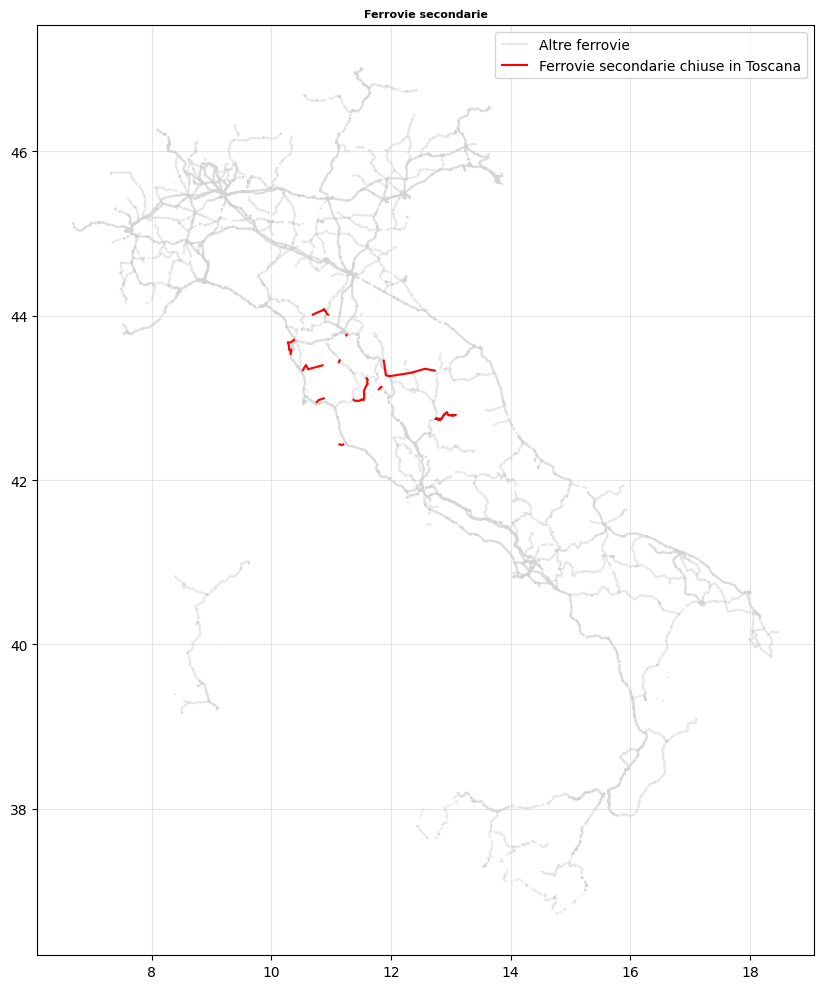

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ferrovie_complete.plot(ax=ax, linewidth=1.5, alpha=0.5, color='lightgray', label='Altre ferrovie')
all_new_railways_gdf.plot(ax=ax, linewidth=1.5, color='red', label='Ferrovie secondarie chiuse in Toscana')

ax.set_title('Ferrovie secondarie', fontsize=8, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mappa_nuova.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# === SALVA SHAPEFILE AGGIORNATO ===
ferrovie_complete.to_file('/content/drive/MyDrive/Colab Notebooks/HEATMAPS/file_italia/ferrovie_con_secondarie.geojson', driver='GeoJSON')
print(f"✅ Salvato: ferrovie_con_secondarie.geojson su Google Drive con un nuovo totale: {len(ferrovie_complete)} linee")

✅ Salvato: ferrovie_con_secondarie.geojson su Google Drive con un nuovo totale: 77878 linee
